# **Binary Tree**

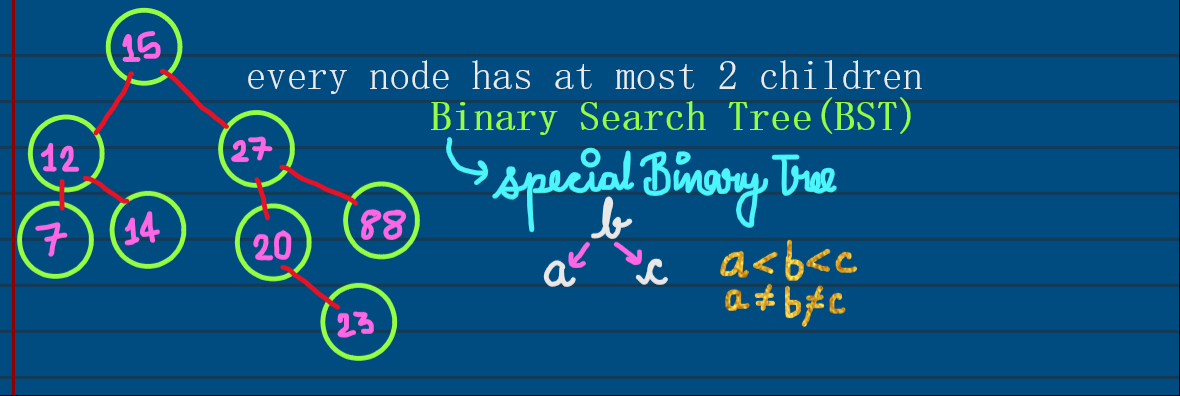

In [ ]:
# Every iteration we reduce the search space by (1/2)
# if n=8 ,            8-> 4 -> 2-> 1
# 3 iterations

# SEARCH COMPLEXITY= O(log n)



# UTILITIES:
#     -> sort the elements in the list
#     -> implement the set type of data structure with unique elements
# TRAVERSAL :     
#     1. BFS      
#     2. DFS      
#             -> In Order Traversal:   [7, 12, 14, 15, 20, 23, 27, 88]
#             -> Pre Order Traversal:  [15, 12, 7, 14, 27, 20, 23, 88]
#             -> Post Order Traversal: [7, 14, 12, 23, 20, 88, 27, 15]

In [ ]:
# DELETION IN A B.S.T.
#     1. Delete a node with no child
#     2. Delete a node with one child
#     3. Delete a node with two children
#         one approach:    
#             -> Copy minimum value from right subtree
#             -> Remove the duplicates from the right subtree
#         another approach:
#             -> Copy the maximum value from the left subtree
#             -> Remove duplicates from the left subtree

In [173]:
class BinarySearchTreeNode:
    def __init__(self, data) -> None:
        self.data= data
        self.left= None
        self.right= None
        self.parent= None

    def delete(self, val):
        if val<self.data:
            if self.left:
                self.left= self.left.delete(val)
            else:
                return None
        elif val>self.data:
            if self.right:
                self.right= self.right.delete(val)
            else:
                return None
        else:
            if self.left is None and self.right is None:
                return None
            if self.left is None:
                return self.right
            if self.right is None:
                return self.left
                # return self.right
            min_val= self.right.find_min()
            self.data= min_val
            self.right= self.right.delete(min_val)
        return self

    def find_min(self):
        if self.left is None:
            return self.data
        return self.left.find_min()

    def add_child(self, data):
        if data==self.data:
            return
        if data<self.data:
            # add data in left subtree
            if self.left:
                self.left.add_child(data)
            else:
                self.left= BinarySearchTreeNode(data)
                self.left.parent=self
        else:
            # add data in right subtree
            if self.right:
                self.right.add_child(data)
            else:
                self.right= BinarySearchTreeNode(data)
                self.right.parent=self

    def in_order_traversal(self):
        elements= []
        # visit the left subtree
        if self.left:
            elements+=self.left.in_order_traversal()
        # visit base node
        elements.append(self.data)
        # visit the right subtree
        if self.right:
            elements+=self.right.in_order_traversal()
        return elements

    def search(self, val)->bool:
        if self.data==val:
            # print(f'Value={val},  matched , POSITIVE')
            return True
        if val< self.data:
            # value might be in left subtree
            if self.left:
                return self.left.search(val)
            else:
                # print(f'Value={val},  not matched , NEGATIVE')
                return False
        if val> self.data:
            # value might be in right subtree
            if self.right:
                return self.right.search(val)
            else:
                # print(f'Value={val},  not matched , NEGATIVE')
                return False

    def getLevel(self):  # return the level of the node
        level = 0
        p = self.parent
        while p:
            level += 1
            p = p.parent
        return level
        
    def printTree(self):
        spaces = 4 * ' ' * self.getLevel()
        prefix = spaces + '|--'
        print(prefix , self.data)
        if self.left :
            # for child in self.children:
            #     child.printTree()
            self.left.printTree()
        if self.right:
            self.right.printTree()


In [174]:
def build_tree(elements):
    root= BinarySearchTreeNode(elements[0])

    for i in range(1, len(elements)):
        root.add_child(elements[i])
    
    return root

In [175]:
numbers = [2, 4, 3]
numbers_tree = build_tree(numbers)

print(numbers_tree.in_order_traversal())


[2, 3, 4]


In [176]:
numbers_tree.printTree()

|-- 2
    |-- 4
        |-- 3


In [177]:
numbers_tree.delete(4)

In [178]:
numbers_tree.printTree()

|-- 2
        |-- 3


In [179]:
# numbers = [17, 4, 1, 20, 9, 23, 18, 34]
numbers = [15, 12, 7, 14, 27, 20, 23, 15, 12, 88]
numbers_tree = build_tree(numbers)

print(numbers_tree.in_order_traversal())


[7, 12, 14, 15, 20, 23, 27, 88]


In [180]:
numbers_tree.printTree()

|-- 15
    |-- 12
        |-- 7
        |-- 14
    |-- 27
        |-- 20
            |-- 23
        |-- 88


In [181]:
print('After deleting 20....')
numbers_tree= numbers_tree.delete(20)
numbers_tree.in_order_traversal()

After deleting 20....


[7, 12, 14, 15, 23, 27, 88]

In [182]:
numbers_tree.printTree()

|-- 15
    |-- 12
        |-- 7
        |-- 14
    |-- 27
            |-- 23
        |-- 88


In [168]:
numbers= [17, 4, 1, 20, 9, 23, 18, 34]
numbers_tree= build_tree(numbers)

print(numbers_tree.in_order_traversal())

[1, 4, 9, 17, 18, 20, 23, 34]


In [96]:
numbers_tree.printTree()

|-- 17
    |-- 4
        |-- 1
        |-- 9
    |-- 20
        |-- 18
        |-- 23
            |-- 34


In [97]:
numbers = [15, 12, 7, 14, 27, 20, 23, 15, 12, 88]
numbers_tree= build_tree(numbers)

print(numbers_tree.in_order_traversal())

[7, 12, 14, 15, 20, 23, 27, 88]


In [98]:
numbers_tree.printTree()

|-- 15
    |-- 12
        |-- 7
        |-- 14
    |-- 27
        |-- 20
            |-- 23
        |-- 88


In [99]:
print(numbers_tree.search(27))
print(numbers_tree.search(45))
print(numbers_tree.search(12))

True
False
True


In [100]:
countries = ['India', 'USA', 'China', 'Pakistan', 'UAE', 'France', 'Japan']
countries_tree = build_tree(countries)

print(countries_tree.in_order_traversal()) # sorted alphabetically


['China', 'France', 'India', 'Japan', 'Pakistan', 'UAE', 'USA']


In [101]:
countries_tree.printTree()

|-- India
    |-- China
        |-- France
    |-- USA
        |-- Pakistan
            |-- Japan
            |-- UAE


## [Excercise 1](https://github.com/codebasics/data-structures-algorithms-python/blob/master/data_structures/8_Binary_Tree_1/8_binary_tree_part_1_exercise.md)
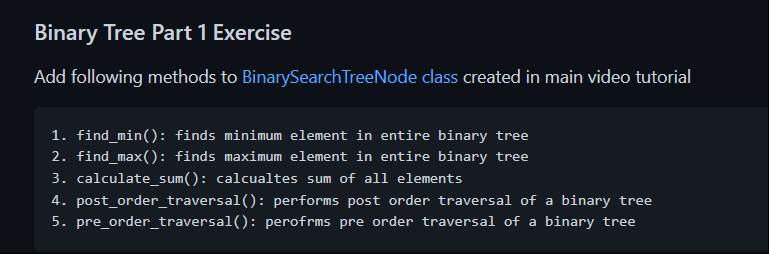

## [Exercise 2](https://github.com/codebasics/data-structures-algorithms-python/blob/master/data_structures/9_Binary_Tree_2/9_binary_tree_part_2_exercise.md)
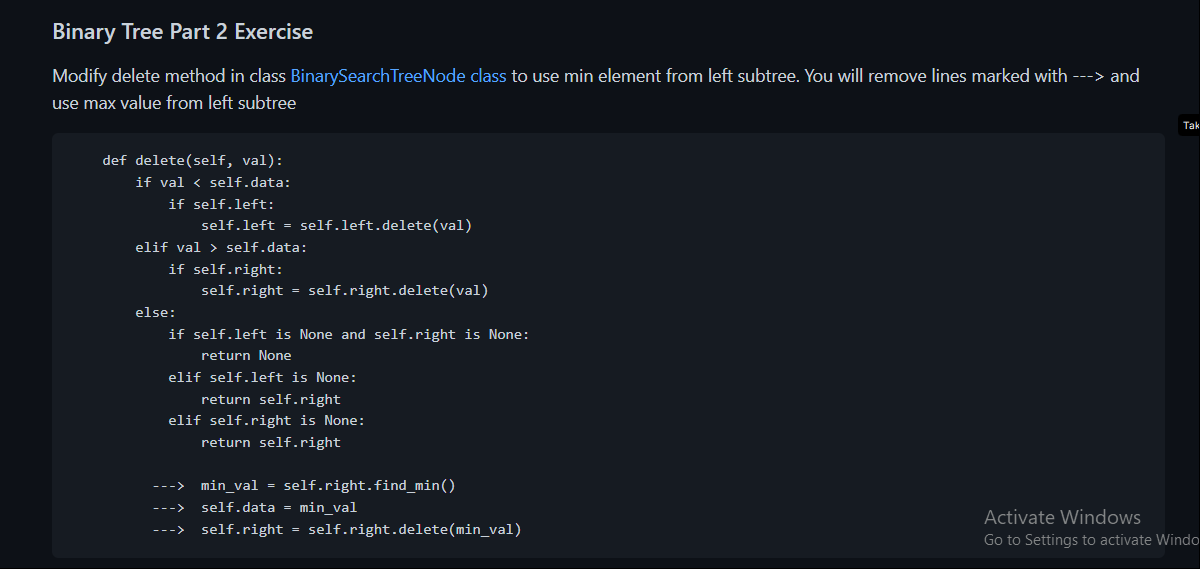

In [183]:
class BinarySearchTreeExcerciseNode:
    def __init__(self, data) -> None:
        self.data = data
        self.left = None
        self.right = None
        self.parent = None

    def add_child(self, data):
        if data == self.data:
            return
        if data < self.data:
            # add data in left subtree
            if self.left:
                self.left.add_child(data)
            else:
                self.left = BinarySearchTreeExcerciseNode(data)
                self.left.parent = self
        else:
            # add data in right subtree
            if self.right:
                self.right.add_child(data)
            else:
                self.right = BinarySearchTreeExcerciseNode(data)
                self.right.parent = self

    def in_order_traversal(self):
        elements = []
        # visit the left subtree
        if self.left:
            elements += self.left.in_order_traversal()
        # visit base node
        elements.append(self.data)
        # visit the right subtree
        if self.right:
            elements += self.right.in_order_traversal()
        return elements

    def pre_order_traversal(self):
        elements = []
        # visit base node
        elements.append(self.data)
        # visit the left subtree
        if self.left:
            elements += self.left.pre_order_traversal()
        # visit the right subtree
        if self.right:
            elements += self.right.pre_order_traversal()
        return elements

    def post_order_traversal(self):
        elements = []
        # visit the left subtree
        if self.left:
            elements += self.left.post_order_traversal()
        # visit the right subtree
        if self.right:
            elements += self.right.post_order_traversal()
        # visit base node
        elements.append(self.data)
        return elements

    def search(self, val) -> bool:
        if self.data == val:
            # print(f'Value={val},  matched , POSITIVE')
            return True
        if val < self.data:
            # value might be in left subtree
            if self.left:
                return self.left.search(val)
            else:
                # print(f'Value={val},  not matched , NEGATIVE')
                return False
        if val > self.data:
            # value might be in right subtree
            if self.right:
                return self.right.search(val)
            else:
                # print(f'Value={val},  not matched , NEGATIVE')
                return False

    def getLevel(self):  # return the level of the node
        level = 0
        p = self.parent
        while p:
            level += 1
            p = p.parent
        return level

    def printTree(self):
        spaces = 4 * ' ' * self.getLevel()
        prefix = spaces + '|--'
        print(prefix, self.data)
        if self.left:
            # for child in self.children:
            #     child.printTree()
            self.left.printTree()
        if self.right:
            self.right.printTree()

    def find_min(self):
        elements= self.in_order_traversal()
        print(f'The minimum node is: {elements[0]}')
        
    def find_max(self):
        elements= self.in_order_traversal()
        print(f'The maximum node is: {elements[-1]}')

    def calculate_sum(self):
        elements= self.in_order_traversal()
        print(f'The sum of all nodes is: {sum(elements)}')

    def delete(self, val):
        if val < self.data:
            if self.left:
                self.left = self.left.delete(val)
        elif val > self.data:
            if self.right:
                self.right = self.right.delete(val)
        else:
            if self.left is None and self.right is None:
                return None
            elif self.left is None:
                return self.right
            elif self.right is None:
                return self.left

            max_val = self.left.find_max()
            self.data = max_val
            self.left = self.left.delete(max_val)
        return self


In [184]:
def build_excercise_tree(elements):
    root = BinarySearchTreeExcerciseNode(elements[0])

    for i in range(1, len(elements)):
        root.add_child(elements[i])

    return root


In [185]:
numbers = [15, 12, 7, 14, 27, 20, 23, 15, 12, 88]
numbers_tree = build_excercise_tree(numbers)

print(f'In Order traversal: {numbers_tree.in_order_traversal()}')
print(f'Pre Order traversal: {numbers_tree.pre_order_traversal()}')
print(f'Post Order traversal: {numbers_tree.post_order_traversal()}')
numbers_tree.find_min()
numbers_tree.find_max()
numbers_tree.calculate_sum()


In Order traversal: [7, 12, 14, 15, 20, 23, 27, 88]
Pre Order traversal: [15, 12, 7, 14, 27, 20, 23, 88]
Post Order traversal: [7, 14, 12, 23, 20, 88, 27, 15]
The minimum node is: 7
The maximum node is: 88
The sum of all nodes is: 206


In [186]:
numbers_tree.printTree()

|-- 15
    |-- 12
        |-- 7
        |-- 14
    |-- 27
        |-- 20
            |-- 23
        |-- 88


In [187]:
numbers_tree.delete(20)
print('After deleting 20...')
print(f'Pre Order traversal: {numbers_tree.pre_order_traversal()}')
print()
numbers_tree.printTree()

After deleting 20...
Pre Order traversal: [15, 12, 7, 14, 27, 23, 88]

|-- 15
    |-- 12
        |-- 7
        |-- 14
    |-- 27
            |-- 23
        |-- 88
